In [121]:
import b2d
import numpy as np
import b2d.plot
import matplotlib.pyplot as plt
from IPython.display import HTML
import random
from b2d.testbed import TestbedBase
from b2d.testbed.backend.jupyter import JupyterGui
from matplotlib.animation import ImageMagickWriter
import copy
import math

In [143]:
def ellipse_chain_shape(positon, a, b, n=50):

    t = np.linspace(start=0, stop=2.0 * np.pi, num=n + 1)
    x = (a * np.cos(t) + positon[0])[:-1]
    y = (b * np.sin(t) + positon[1])[:-1]
    verts = np.stack([x, y], -1)
    verts = np.require(verts, requirements=["C"])
    #print(np.flip(verts, axis=0))
    arr=np.flip(verts, axis=0)
    #print(arr,arr[0],arr[:, 0])
    x = arr[:, 0]
    y = arr[:, 1]
    

    

    # combine x and y coordinates and convert to tuple
    result = list(zip(x, y))
    #print(result)
    
    return result





def generate_tuples(n):
    tuples_list = [(random.randint(5, 45),random.randint(5, 45))]
    while len(tuples_list)<n:
        x = random.randint(5, 45)
        y = random.randint(5, 45)
        tuples_list=add_new_point(tuples_list, x, y, 5)
    return tuples_list



def distance(p1, p2):
    
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def add_new_point(tuples_list, x_new, y_new, d):
    
    new_point = (x_new, y_new)
    for point in tuples_list:
        if distance(point, new_point) < d:
            return tuples_list
    

    tuples_list.append(new_point)
    return tuples_list



In [138]:
print(stop)
world = b2d.world(gravity=(0, 0))
pdef = b2d.particle_system_def(radius=0.1,elastic_strength=50)
psystem = world.create_particle_system(pdef)


dimensions = [30, 30]
box_shape = b2d.ChainShape()
box_shape.create_loop(
    [
        (0, 0),
        (0, dimensions[1]),
        (dimensions[0], dimensions[1]),
        (dimensions[0], 0),
    ]
)
box = world.create_static_body(
    position=(0, 0), fixtures=b2d.fixture_def(shape=box_shape, friction=0)
)

NameError: name 'stop' is not defined

In [139]:
emitter_pos = (0.1, 0)
emitter_def = b2d.RandomizedLinearEmitterDef()
emitter_def.emite_rate = 40
emitter_def.lifetime = 20.1
emitter_def.size = (2, 1)
# emitter_def.transform = b2d.Transform(emitter_pos, b2d.Rot(0))
emitter_def.velocity = (-40, 20)
emitter = b2d.RandomizedLinearEmitter(psystem, emitter_def)

NameError: name 'psystem' is not defined

In [ ]:
#fig, ax, ani = b2d.plot.animate_world(
#    world, ppm=20, bounding_box=((-10, -20), (20, 15)), pre_step=emitter.step, t=5
#)
#ani
#plt.show()
#HTML(ani.to_jshtml())
#IPython.display.HTML

In [ ]:
class ColorMixing(TestbedBase):

    name = "ColorMixing"

    def __init__(self, settings=None):
        super(ColorMixing, self).__init__(settings=settings)
        dimensions = [30, 30]

        # the outer box
        box_shape = b2d.ChainShape()
        box_shape.create_loop(
            [
                (0, 0),
                (0, dimensions[1]),
                (dimensions[0], dimensions[1]),
                (dimensions[0], 0),
            ]
        )
        box = self.world.create_static_body(position=(0, 0), shape=box_shape)

        fixtureA = b2d.fixture_def(
            shape=b2d.circle_shape(1), density=2.2, friction=0.2, restitution=0.5
        )
        body = self.world.create_dynamic_body(position=(13, 10), fixtures=fixtureA)

        pdef = b2d.particle_system_def(
            viscous_strength=0.9,
            spring_strength=0.0,
            damping_strength=0.5,
            pressure_strength=0.5,
            color_mixing_strength=0.008,
            density=2,
        )
        psystem = self.world.create_particle_system(pdef)
        psystem.radius = 0.3
        psystem.damping = 1.0

        colors = [
            (255, 0, 0, 255),
            (0, 255, 0, 255),
            (0, 0, 255, 255),
            (255, 255, 0, 255),
        ]
        posiitons = [(6, 10), (20, 10), (20, 20), (6, 20)]
        for color, pos in zip(colors, posiitons):

            shape = b2d.polygon_shape(box=(5, 5), center=pos, angle=0)
            pgDef = b2d.particle_group_def(
                flags=b2d.ParticleFlag.waterParticle
                | b2d.ParticleFlag.colorMixingParticle,
                # group_flags=b2d.ParticleGroupFlag.solidParticleGroup,
                shape=shape,
                strength=1.0,
                color=color,
            )
            group = psystem.create_particle_group(pgDef)



In [ ]:

#b2d.loop_shape(np.flip(verts, axis=0))


dimensions = [30, 30]
world=b2d.world(gravity=(0, 0))
# the outer box
box_shape = b2d.ChainShape()
box_shape.create_loop(
    [
        (0, 0),
        (0, dimensions[1]),
        (dimensions[0], dimensions[1]),
        (dimensions[0], 0),
    ]
)
box = world.create_static_body(position=(0, 0), shape=box_shape)

#fixtureA = b2d.fixture_def(
#    shape=b2d.circle_shape(1), density=2.2, friction=0.2, restitution=0.5
#)
#body = world.create_dynamic_body(position=(13, 10), fixtures=fixtureA)

pdef = b2d.particle_system_def(
    viscous_strength=0.9,
    spring_strength=0.8,
    damping_strength=0.5,
    pressure_strength=0.5,
    color_mixing_strength=0.108,
    density=2,
    elastic_strength=0.8
)
psystem = world.create_particle_system(pdef)
psystem.radius = 0.3
psystem.damping = 1.0

colors = [
    (255, 0, 0, 255),
    (0, 255, 0, 255),
    (0, 0, 255, 255),
    (255, 255, 0, 255),
]
verts=[(0, 0),(0, dimensions[1]),(dimensions[0], dimensions[1]),(dimensions[0], 0)]
#print('verts0',verts)
posiitons = [(8, 19), (20, 10), (20, 20), (6, 20)]
for color, pos in zip(colors, posiitons):
    a=2*np.random.random_sample()-1
    b=2*np.random.random_sample()-1
    verts=ellipse_chain_shape(pos, 5+a, 4.5+b, n=11),
    #print('verts1',verts[0])

    #shape = b2d.polygon_shape(box=(5, 5), center=pos, angle=0)
    pgDef = b2d.particle_group_def(
        flags=b2d.ParticleFlag.elasticParticle,
        #| b2d.ParticleFlag.colorMixingParticle,
        group_flags=b2d.ParticleGroupFlag.solidParticleGroup,
        linear_velocity=(2*np.random.random_sample()-2, 2*np.random.random_sample()-2),
        shape=b2d.polygon_shape(center=pos, vertices=verts[0]),#b2d.polygon_shape(center=pos, vertices=verts),#ellipse_chain_shape(pos, 5, 2, n=500),#b2d.circle_shape(3,pos)
        strength=1.0,
        color=color,
    )
    group = psystem.create_particle_group(pgDef)
    #print(group.linear_velocity)
    #help(group)


In [ ]:
fig, ax, ani = b2d.plot.animate_world(world,t=10)
#help(world)
#print(world.find_body((8, 19), margin=50))
#print(world.find_closest_n_particles((8, 19), r=50))
HTML(ani.to_jshtml())
#with open('animation.html', 'w') as f:
#    f.write(html.data)
    
#writer = ImageMagickWriter(fps=30)

# save the animation as a GIF
#ani.save('animation.gif', writer=writer)

In [144]:
def star_shape(positon, a, b, n=10):

    t = np.linspace(start=0, stop=2.0 * np.pi, num=n)
    #print(t)
    #x = (a * np.cos(t) + positon[0])[:-1]
    #y = (b * np.sin(t) + positon[1])[:-1]
    r=0.2 * np.random.randn(n) + 2
    r[-1]=r[0]
    #al=np.sort(2*np.pi*np.random.random_sample((n,)))
    #print(al)
    os=0.2 * np.random.randn() + 2
    x_0=np.array([positon[0]])
    y_0=np.array([positon[1]])
    x=r*np.cos(t+os)+positon[0]
    y=r*np.sin(t+os)+positon[1]
    
    
    
    x_org=copy.deepcopy(x).tolist()
    y_org=copy.deepcopy(y).tolist()
    
    print('x_org',x_org)
    
    #x=x.tolist()
    #y=y.tolist()
    x=[]
    y=[]
    

    for i in range(len(x_org)):
        x0, y0 = x_org[i], y_org[i]
        try:
            x1, y1 = x_org[i + 1], y_org[i + 1]
            n_interpolations = n_dens(1/(np.sqrt(2)*0.2),x_org[i], y_org[i],x_org[i + 1], y_org[i + 1])
        except:
            x1, y1 = x_org[0], y_org[0]
            n_interpolations = n_dens(1/(np.sqrt(2)*0.2),x_org[i], y_org[i],x_org[0], y_org[0])
            
        
        dx = (x1 - x0) / (n_interpolations + 1)
        for j in range(n_interpolations):
            x_interpolated = x0 + (j + 1) * dx
            y_interpolated = y0 + (x_interpolated - x0) * ((y1 - y0) / (x1 - x0))
            print('x_int',x_interpolated)
            x.append(x_interpolated)
            y.append(y_interpolated)
            
            
            
        
    '''x0, y0 = x_org[-1], y_org[-1]
    x1, y1 = x_org[0], y_org[0]
    dx = (x1 - x0) / (n_interpolations + 1)
    for j in range(n_interpolations):
        x_interpolated = x0 + (j + 1) * dx
        y_interpolated = y0 + (x_interpolated - x0) * ((y1 - y0) / (x1 - x0))
        x.insert(i + j + 2, x_interpolated)
        y.insert(i + j + 2, y_interpolated)
    '''

    
    
    x=np.array(x)
    y=np.array(y)
    
    x=np.append(x_0,x)
    y=np.append(y_0,y)
    print('x',x)
    #print('y',y)
    
    l=len(x)
    
    
    
    
    
    
    
    
    
    
    
    verts = np.stack([x, y], -1)
    verts = np.require(verts, requirements=["C"])
    #print(np.flip(verts, axis=0))
    arr=np.flip(verts, axis=0)
    #print(arr,arr[0],arr[:, 0])
    x = arr[:, 0]
    y = arr[:, 1]
    
    print('x2',x)

    

    # combine x and y coordinates and convert to tuple
    result = list(zip(x, y))
    #print(result)
    
    return result,l


def leng(tup_a,tup_b):
    dx=tup_a[0]-tup_b[0]
    dy=tup_a[1]-tup_b[1]
    return np.sqrt((dx**2)+(dy**2))

def n_dens(d,x1,y1,x2,y2):
    l=leng((x1,y1),(x2,y2))
    return int(l*d)

In [145]:
world=b2d.world(gravity=(0, 0))
# the outer box
dimensions = [50, 50]
box_shape = b2d.ChainShape()
box_shape.create_loop(
    [
        (0, 0),
        (0, dimensions[1]),
        (dimensions[0], dimensions[1]),
        (dimensions[0], 0),
    ]
)
box = world.create_static_body(position=(0, 0), shape=box_shape)

bodies = []

# create  a static body as anchor
#b = world.create_static_body(
#    position=(0, 4), fixtures=b2d.fixture_def(shape=b2d.polygon_shape(box=[0.3, 0.5]))
#)
#bodies.append(b)
posiitons = generate_tuples(10)

for pos in posiitons:
    bodies = []
    verts,l=star_shape(pos, 1, 1, n=7)
    print('v',verts)
    v1=2*np.random.random_sample()-1
    v2=2*np.random.random_sample()-1
    print('l',l)
    for i in range(l):
        #print(verts[i])
        
        b = world.create_dynamic_body(
            position=verts[i],
            fixtures=b2d.fixture_def(shape=b2d.polygon_shape(box=[0.2, 0.2]), density=0.1),
            linear_damping=0,
            angular_damping=0,
            linear_velocity=(20*v1,20*v2),
        )
        bodies.append(b)
#create_distance_joint(anchor, body, length=10, stiffness=0.5 * (i + 1))

    for j in range(len(bodies) - 1):
        if j!=len(bodies) - 2:
            
            a = bodies[j]
            b = bodies[j + 1]
            #print(a.world_center)
            world.create_distance_joint(
                a,
                b,
                local_anchor_a=(0.0, 0.0),
                local_anchor_b=(0.0, 0.0),
                damping=0.0,
                length=leng(a.world_center,b.world_center),
                stiffness=10**6,
            )
            
            #world.create_weld_joint(
             #   a,
             #   b,
             #   local_anchor_a=(0.2, -0.2),
             #   local_anchor_b=(-0.2, -0.2),
             #   damping=0.1,
             #   reference_angle=0,
             #   stiffness=10**8,
            #)
            
            
            a = bodies[-1]
            b = bodies[j]
            
            world.create_distance_joint(
                a,
                b,
                local_anchor_a=(0.0, 0.0),
                local_anchor_b=(0.0, 0.0),
                damping=0.0,
                length=leng(a.world_center,b.world_center),
                stiffness=10,
            )
            
            #world.create_weld_joint(
            #    a,
            #    b,
            #    local_anchor_a=(0.2, -0.2),
            #    local_anchor_b=(-0.2, -0.2),
            #    damping=0.1,
            #    reference_angle=0,
            #    stiffness=10**7,
            #)
            
    world.create_distance_joint(
                bodies[-2],
                bodies[0],
                local_anchor_a=(0.0, 0.0),
                local_anchor_b=(0.0, 0.0),
                damping=0.0,
                length=leng(bodies[-2].world_center,bodies[0].world_center),
                stiffness=10**6,
            )
    
    world.create_distance_joint(
                bodies[-1],
                bodies[-2],
                local_anchor_a=(0.0, 0.0),
                local_anchor_b=(0.0, 0.0),
                damping=0.0,
                length=leng(bodies[-2].world_center,bodies[-1].world_center),
                stiffness=10,
            )
    
    #world.create_weld_joint(
    #        bodies[-2],
    #        bodies[0],
    #        local_anchor_a=(0.2, -0.2),
    #        local_anchor_b=(-0.2, -0.2),
    #        damping=0.1,
    #        reference_angle=0,
    #        stiffness=10**8,
    #    )
    

#print(world.find_closest_n_bodies((8, 19), r=50)((8, 19), margin=50))

x_org [26.47329075050088, 25.041375751128903, 25.34593590558024, 27.506076834980817, 29.26633137708376, 28.50726777185842, 26.473290750500883]
x_int 26.294301375579384
x_int 26.115312000657887
x_int 25.936322625736388
x_int 25.75733325081489
x_int 25.578343875893395
x_int 25.399354500971896
x_int 25.2203651260504
x_int 25.07944577043532
x_int 25.117515789741738
x_int 25.155585809048155
x_int 25.193655828354572
x_int 25.23172584766099
x_int 25.269795866967407
x_int 25.307865886273824
x_int 25.615953521755312
x_int 25.885971137930383
x_int 26.155988754105458
x_int 26.42600637028053
x_int 26.6960239864556
x_int 26.966041602630675
x_int 27.236059218805746
x_int 27.726108652743683
x_int 27.946140470506553
x_int 28.166172288269422
x_int 28.386204106032288
x_int 28.606235923795154
x_int 28.826267741558024
x_int 29.046299559320893
x_int 29.17144842643059
x_int 29.076565475777425
x_int 28.981682525124256
x_int 28.88679957447109
x_int 28.791916623817922
x_int 28.697033673164754
x_int 28.60215072

/home/mo/anaconda3/envs/pysics/lib/python3.10/site-packages/b2d/plot.py:128: UserWarning: You passed in an explicit save_count=145 which is being ignored in favor of frames=145.
  ani = animation.FuncAnimation(


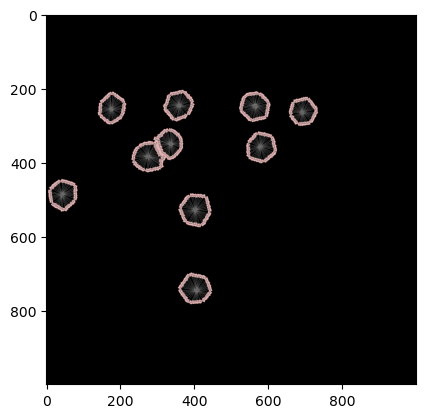

In [146]:
fig, ax, ani = b2d.plot.animate_world(world,t=6)
#help(world)
#print(world.find_body((8, 19), margin=50))
HTML(ani.to_jshtml())

In [100]:
x=np.sort(2*np.pi*np.random.random_sample((15,)))
print(x,x+4)
for j in range(len(x) - 1):
    print(x[j])
    
print(x[len(x) - 2])

[0.84954848 1.08173871 1.32260396 1.54686305 1.63367503 2.93523529
 3.72654869 4.33749538 4.35557685 4.56319746 4.77725241 4.89612587
 4.95351036 5.56963562 6.14379039] [ 4.84954848  5.08173871  5.32260396  5.54686305  5.63367503  6.93523529
  7.72654869  8.33749538  8.35557685  8.56319746  8.77725241  8.89612587
  8.95351036  9.56963562 10.14379039]
0.8495484774181244
1.0817387107783762
1.3226039561782594
1.546863046997935
1.6336750328215721
2.935235290325482
3.7265486940190864
4.337495377291087
4.355576845072819
4.5631974569787985
4.777252413836586
4.896125867832517
4.953510362139764
5.569635624229598
5.569635624229598
